In [79]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [80]:
res_path = 'medmnist_eval_results4'

columns = pd.MultiIndex.from_product([['Generated', 'Original'], ['Accuracy (%)', 'F1', 'Cohen Kappa']])
df = pd.DataFrame(columns=columns)

ds_names = [ds for ds in os.listdir(res_path)]

for ds_name in ds_names:
    
    gen_accs = np.zeros(5) 
    gen_f1 = np.zeros(5)
    gen_cohen = np.zeros(5)
    
    orig_accs = np.zeros(5)
    orig_f1 = np.zeros(5)
    orig_cohen = np.zeros(5)
    
    for run in range(5):
        
        with open(os.path.join(res_path, ds_name, f'run_{run}', 'classifier_generated', 'results.pkl'), 'rb') as f:
            results = pickle.load(f)
            gen_accs[run] = results['accuracy']['overall']
            gen_f1[run] = results['f1']
            gen_cohen[run] = results['cohen']
        
        with open(os.path.join(res_path, ds_name, f'run_{run}', 'classifier_original', 'results.pkl'), 'rb') as f:
            results = pickle.load(f)
            orig_accs[run] = results['accuracy']['overall']
            orig_f1[run] = results['f1']
            orig_cohen[run] = results['cohen']

    df.loc[ds_name] = [gen_accs.mean(), gen_f1.mean(), gen_cohen.mean(), orig_accs.mean(), orig_f1.mean(), orig_cohen.mean()]

# df

# Format the metrics
df.loc[:, ('Generated','Accuracy (%)')] = df.loc[:, ('Generated','Accuracy (%)')] * 100
df.loc[:, ('Original','Accuracy (%)')] = df.loc[:, ('Original','Accuracy (%)')] * 100
df.loc[:, ('Generated','Accuracy (%)')] = df.loc[:, ('Generated','Accuracy (%)')].map(lambda x: f"{x:.2f}")
df.loc[:, ('Original','Accuracy (%)')] = df.loc[:, ('Original','Accuracy (%)')].map(lambda x: f"{x:.2f}")

df.loc[:, [('Generated', 'F1'), ('Generated', 'Cohen Kappa'), ('Original', 'F1'), ('Original', 'Cohen Kappa')]] = df.loc[:, [('Generated', 'F1'), ('Generated', 'Cohen Kappa'), ('Original', 'F1'), ('Original', 'Cohen Kappa')]].map(lambda x: f"{x:.3f}")


name_mapping = {
    "octmnist": "OCTMNIST",
    "organamnist": "OrganAMNIST",
    "organcmnist": "OrganCMNIST",
    "tissuemnist": "TissueMNIST",
    "pathmnist": "PathMNIST",
    "bloodmnist": "BloodMNIST",
    "organsmnist": "OrganSMNIST",
    "dermamnist": "DermaMNIST"
}

# Reorder the datasets according to the second image
new_order = [
    "PathMNIST",
    "DermaMNIST",
    "OCTMNIST",
    "BloodMNIST",
    "TissueMNIST",
    "OrganAMNIST",
    "OrganCMNIST",
    "OrganSMNIST"
]

# Apply the name mapping to the 'Dataset' column
df['Dataset'] = df.index.map(name_mapping)

# Reindex the dataframe according to the new order
df.set_index('Dataset', inplace=True)
df = df.loc[new_order].reset_index()
df.set_index('Dataset', inplace=True)
df.index.name = None
df

/tmp/ipykernel_4100707/3005890775.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['79.14' '89.19' '81.99' '55.02' '92.72' '96.01' '70.29' '75.77']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, ('Generated','Accuracy (%)')] = df.loc[:, ('Generated','Accuracy (%)')].map(lambda x: f"{x:.2f}")
/tmp/ipykernel_4100707/3005890775.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['83.92' '91.81' '86.89' '63.47' '93.61' '98.19' '76.25' '83.92']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, ('Original','Accuracy (%)')] = df.loc[:, ('Original','Accuracy (%)')].map(lambda x: f"{x:.2f}")
/tmp/ipykernel_4100707/3005890775.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. 

Generated                        Original                   
            Accuracy (%)     F1 Cohen Kappa Accuracy (%)     F1 Cohen Kappa
PathMNIST          92.72  0.928       0.916        93.61  0.938       0.927
DermaMNIST         75.77  0.731       0.473        83.92  0.834       0.681
OCTMNIST           79.14  0.787       0.722        83.92  0.836       0.786
BloodMNIST         96.01  0.960       0.953        98.19  0.982       0.979
TissueMNIST        55.02  0.509       0.412        63.47  0.621       0.533
OrganAMNIST        89.19  0.890       0.879        91.81  0.917       0.908
OrganCMNIST        81.99  0.818       0.796        86.89  0.869       0.852
OrganSMNIST        70.29  0.700       0.660        76.25  0.758       0.728

In [81]:
transformed_data = []
for index, row in df.iterrows():
    transformed_data.append([index, row['Original']['Accuracy (%)'], row['Original']['F1'], row['Original']['Cohen Kappa']])
    transformed_data.append(['\hspace{7mm}Generated', row['Generated']['Accuracy (%)'], row['Generated']['F1'], row['Generated']['Cohen Kappa']])

# Create a new DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=['Dataset', 'Accuracy (%)', 'F1', 'Cohen Kappa'])

transformed_df


<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_4100707/3050633197.py:4: SyntaxWarning: invalid escape sequence '\h'
  transformed_data.append(['\hspace{7mm}Generated', row['Generated']['Accuracy (%)'], row['Generated']['F1'], row['Generated']['Cohen Kappa']])


,Dataset,Accuracy (%),F1,Cohen Kappa
0,PathMNIST,93.61,0.938,0.927
1,\hspace{7mm}Generated,92.72,0.928,0.916
2,DermaMNIST,83.92,0.834,0.681
3,\hspace{7mm}Generated,75.77,0.731,0.473
4,OCTMNIST,83.92,0.836,0.786
5,\hspace{7mm}Generated,79.14,0.787,0.722
6,BloodMNIST,98.19,0.982,0.979
7,\hspace{7mm}Generated,96.01,0.960,0.953
8,TissueMNIST,63.47,0.621,0.533
9,\hspace{7mm}Generated,55.02,0.509,0.412


In [82]:
# Generate LaTeX table
caption = 'Mean test set performance of classifiers trained on embeddings of the original versions and anonymized (Generated) versions of the 2D multi-class MedMNISTv2 datasets, averaged over 5 runs.'
label = 'tab:medmnist_accs'

latex_table = transformed_df.to_latex(
    index=False,
    column_format='lccc',
    escape=False
)

latex_table = f"""\\begin{{table}}[!ht]
\\centering
\\rowcolors{{2}}{{gray!10}}{{white}}
{latex_table}
\\caption{{{caption}}}
\\label{{{label}}}
\\end{{table}}
"""

latex_table = latex_table.replace('Dataset & Accuracy (%) & F1 & Cohen Kappa \\', '& \\textbf{Accuracy} & \\textbf{F1 Score} & \\textbf{Cohen\'s \(\\boldsymbol{\kappa}\)}\\')

print(latex_table)

\begin{table}[!ht]
\centering
\rowcolors{2}{gray!10}{white}
\begin{tabular}{lccc}
\toprule
& \textbf{Accuracy} & \textbf{F1 Score} & \textbf{Cohen's \(\boldsymbol{\kappa}\)}\\
\midrule
PathMNIST & 93.61 & 0.938 & 0.927 \\
\hspace{7mm}Generated & 92.72 & 0.928 & 0.916 \\
DermaMNIST & 83.92 & 0.834 & 0.681 \\
\hspace{7mm}Generated & 75.77 & 0.731 & 0.473 \\
OCTMNIST & 83.92 & 0.836 & 0.786 \\
\hspace{7mm}Generated & 79.14 & 0.787 & 0.722 \\
BloodMNIST & 98.19 & 0.982 & 0.979 \\
\hspace{7mm}Generated & 96.01 & 0.960 & 0.953 \\
TissueMNIST & 63.47 & 0.621 & 0.533 \\
\hspace{7mm}Generated & 55.02 & 0.509 & 0.412 \\
OrganAMNIST & 91.81 & 0.917 & 0.908 \\
\hspace{7mm}Generated & 89.19 & 0.890 & 0.879 \\
OrganCMNIST & 86.89 & 0.869 & 0.852 \\
\hspace{7mm}Generated & 81.99 & 0.818 & 0.796 \\
OrganSMNIST & 76.25 & 0.758 & 0.728 \\
\hspace{7mm}Generated & 70.29 & 0.700 & 0.660 \\
\bottomrule
\end{tabular}

\caption{Mean test set performance of classifiers trained on embeddings of the original ver

<>:20: SyntaxWarning: invalid escape sequence '\('
<>:20: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_4100707/3001279563.py:20: SyntaxWarning: invalid escape sequence '\('
  latex_table = latex_table.replace('Dataset & Accuracy (%) & F1 & Cohen Kappa \\', '& \\textbf{Accuracy} & \\textbf{F1 Score} & \\textbf{Cohen\'s \(\\boldsymbol{\kappa}\)}\\')


In [83]:
caption = 'Mean test set performance of the generated and original classifiers on the 2D multi-class MedMNISTv2 datasets over 5 runs. \(\\boldsymbol{\kappa}\) denotes Cohen\'s Kappa.'
label = 'tab:medmnist_accs'       
 
latex_table = df.to_latex(
    column_format='lcccccc',
    escape=True,
    multicolumn=True,
    multirow=False
)

latex_table = f"\\begin{{table}}[!ht]\n\\centering\n{latex_table}\n\\caption{{{caption}}}\n\\label{{{label}}}\n\\end{{table}}"
latex_table = latex_table.replace('& \multicolumn{3}{r}{Generated} & \multicolumn{3}{r}{Original} \\\\', '& \multicolumn{3}{c}{\\textbf{Generated}} & \multicolumn{3}{c}{\\textbf{Original}} \\\\\n\cmidrule(lr){2-4} \cmidrule(lr){5-7}')
latex_table = latex_table.replace('& Accuracy (\%) & F1 & Cohen Kappa & Accuracy (\%) & F1 & Cohen Kappa \\\\', '& \\textbf{Accuracy} & \\textbf{F1} & \(\\boldsymbol{\kappa}\) & \\textbf{Accuracy} & \\textbf{F1} & \(\\boldsymbol{\kappa}\) \\\\')

print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lcccccc}
\toprule
 & \multicolumn{3}{c}{\textbf{Generated}} & \multicolumn{3}{c}{\textbf{Original}} \\
\cmidrule(lr){2-4} \cmidrule(lr){5-7}
 & \textbf{Accuracy} & \textbf{F1} & \(\boldsymbol{\kappa}\) & \textbf{Accuracy} & \textbf{F1} & \(\boldsymbol{\kappa}\) \\
\midrule
PathMNIST & 92.72 & 0.928 & 0.916 & 93.61 & 0.938 & 0.927 \\
DermaMNIST & 75.77 & 0.731 & 0.473 & 83.92 & 0.834 & 0.681 \\
OCTMNIST & 79.14 & 0.787 & 0.722 & 83.92 & 0.836 & 0.786 \\
BloodMNIST & 96.01 & 0.960 & 0.953 & 98.19 & 0.982 & 0.979 \\
TissueMNIST & 55.02 & 0.509 & 0.412 & 63.47 & 0.621 & 0.533 \\
OrganAMNIST & 89.19 & 0.890 & 0.879 & 91.81 & 0.917 & 0.908 \\
OrganCMNIST & 81.99 & 0.818 & 0.796 & 86.89 & 0.869 & 0.852 \\
OrganSMNIST & 70.29 & 0.700 & 0.660 & 76.25 & 0.758 & 0.728 \\
\bottomrule
\end{tabular}

\caption{Mean test set performance of the generated and original classifiers on the 2D multi-class MedMNISTv2 datasets over 5 runs. \(\boldsymbol{\kappa}\) 

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\%'
<>:13: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_4100707/333092266.py:1: SyntaxWarning: invalid escape sequence '\('
  caption = 'Mean test set performance of the generated and original classifiers on the 2D multi-class MedMNISTv2 datasets over 5 runs. \(\\boldsymbol{\kappa}\) denotes Cohen\'s Kappa.'
/tmp/ipykernel_4100707/333092266.py:12: SyntaxWarning: invalid escape sequence '\m'
  latex_table = latex_table.replace('& \multicolumn{3}{r}{Generated} & \multicolumn{3}{r}{Original} \\\\', '& \multicolumn{3}{c}{\\textbf{G

/tmp/ipykernel_4100707/3689129792.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, gen_orig_df, orig_orig_df], ignore_index=True)


/tmp/ipykernel_4100707/3689129792.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45, ha='right')


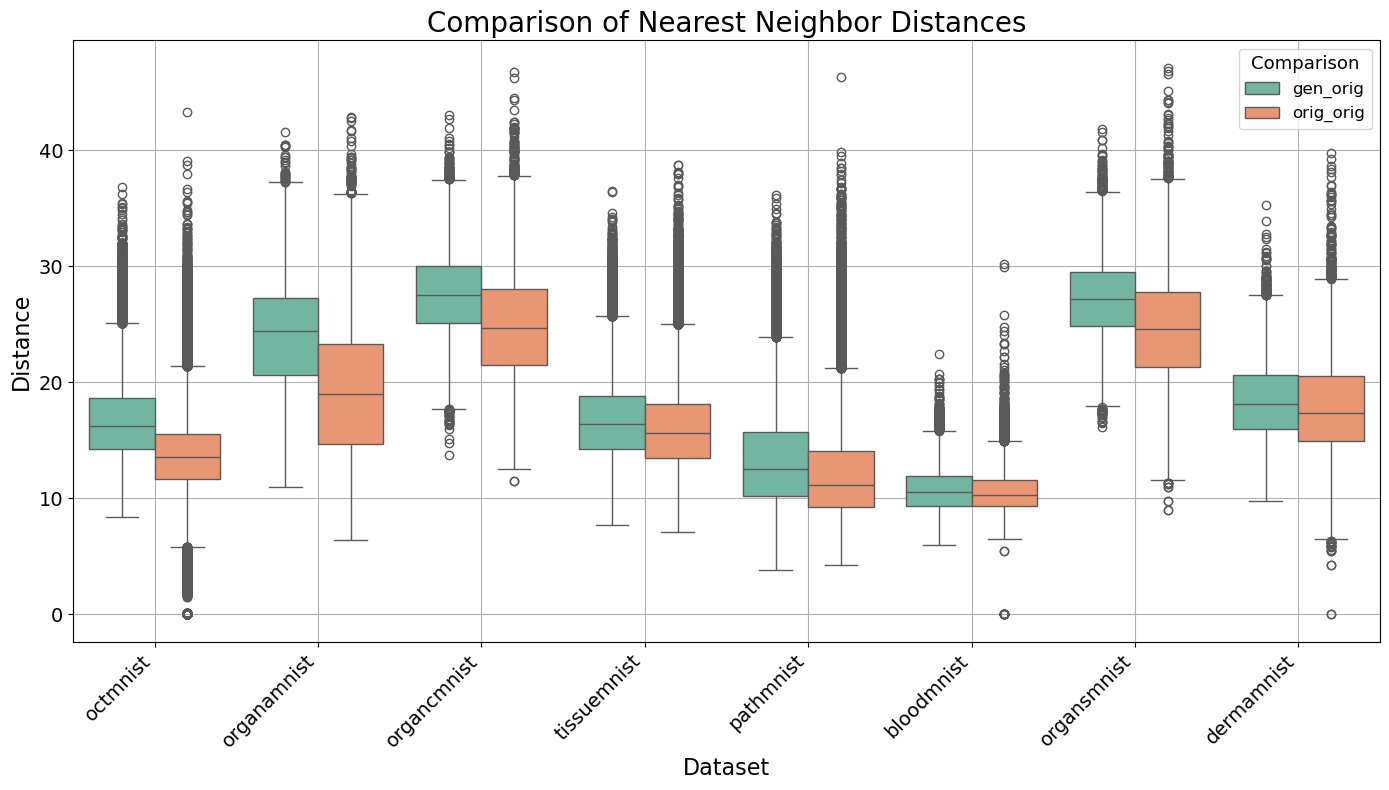

In [84]:
import seaborn as sns

res_path = 'medmnist_eval_results4'

ds_names = [ds for ds in os.listdir(res_path)]

columns = ['dataset', 'comparison', 'distance']
df = pd.DataFrame(columns=columns)

for col, ds_name in enumerate(ds_names):
    
    gen_orig = torch.load(os.path.join(res_path, ds_name, 'nn_distances', 'generated_original.pt'))
    orig_orig = torch.load(os.path.join(res_path, ds_name, 'nn_distances', 'original_original.pt'))
    
    gen_orig_df = pd.DataFrame({
        'dataset': ds_name,
        'comparison': 'gen_orig',
        'distance': gen_orig.cpu().numpy()
    })
    
    orig_orig_df = pd.DataFrame({
        'dataset': ds_name,
        'comparison': 'orig_orig',
        'distance': orig_orig.cpu().numpy()
    })
    
    df = pd.concat([df, gen_orig_df, orig_orig_df], ignore_index=True)

# Set the style and context for the plot
# sns.set(style="whitegrid", context="talk")

# Create the boxplot
plt.figure(figsize=(14, 8))
box_plot = sns.boxplot(data=df, x="dataset", y="distance", hue="comparison", palette="Set2")

# Rotate the x labels for better readability
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45, ha='right')

# Increase font sizes for better readability
box_plot.set_xlabel("Dataset", fontsize=16)
box_plot.set_ylabel("Distance", fontsize=16)
box_plot.set_title("Comparison of Nearest Neighbor Distances", fontsize=20)
box_plot.tick_params(axis='x', labelsize=14)
box_plot.tick_params(axis='y', labelsize=14)

# Improve legend
plt.legend(title="Comparison", title_fontsize='13', fontsize='12')

# Add gridlines
plt.grid(True)

# Tight layout for better spacing
plt.tight_layout()

# # Save the figure (if needed)
plt.savefig("comparison_boxplot.png", dpi=300)

# Display the plot
plt.show()
